In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2
import numpy
%matplotlib inline

/Users/christopouloscosta/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


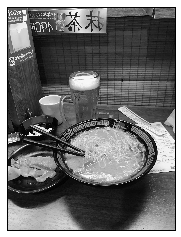

In [4]:
#with opencv, open image, rotate it, and reshape into (1,m,n,1) tensor
# img = Image.open('samp_image.jpeg')
img = cv2.imread('samp_image.jpeg',0)
img = numpy.asarray(img, dtype='float32') / 256.
img = img.transpose()

# reshape image to have a leading 1 dimension
img_shape = img.shape
img_reshaped = img.reshape(1, img_shape[0], img_shape[1],1)

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



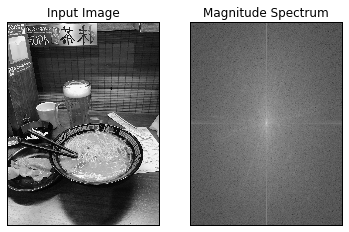

In [16]:
###fft
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

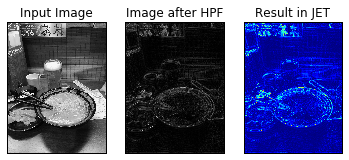

In [25]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

crop_diameter = 60
crop_radius = np.floor(crop_diameter/2)

fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
kern = np.zeros([3,3,1,1])

#3x3 gussian kernal
# kern[0,:,:,:] = np.array([0.077847, 0.123317, 0.077847]).reshape((3,1,1))
# kern[1,:,:,:] = np.array([0.123317,0.195346,0.123317]).reshape((3,1,1))
# kern[2,:,:,:] = np.array([0.077847,0.123317,0.077847]).reshape((3,1,1))


#3*3 edge kernal
# kern[0,:,:,:] = np.array([-1,-1,-1]).reshape((3,1,1))
# kern[1,:,:,:] = np.array([-1,8,-1]).reshape((3,1,1))
# kern[2,:,:,:] = np.array([-1,-1,-1]).reshape((3,1,1))f

#3*3 sovel 
# kern[0,:,:,:] = np.array([-3,-1,-1]).reshape((3,1,1))
# kern[1,:,:,:] = np.array([-1,8,-1]).reshape((3,1,1))
# kern[2,:,:,:] = np.array([-1,-1,-1]).reshape((3,1,1))


kern = per_kern_sin.reshape((per_kern_sin.shape[0],per_kern_sin.shape[1],1,1))


# plt.imshow(img[:,:,0].transpose(), cmap=plt.get_cmap('Greys'))

In [24]:
# img1 = cv2.imread('samp_image.jpeg')
# img1 = cv2.imread('radar_samp.png')
# gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

# sift = cv2.SIFT()
# kp = sift.detect(gray1)

# img=cv2.drawKeypoints(img1,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# cv2.imwrite('sift_keypoints.jpg',img)

In [13]:
def convolve(img, kernel, strides=[1, 3, 3, 1], padding='SAME'):
    '''Convolve SINGLE filter with SINGLE image with tensorflow and return results'''
    with tf.Graph().as_default():

   

        x = tf.placeholder('float32', [1, None, None, 1])
        w = tf.get_variable('w', initializer=tf.to_float(kernel))

        # operations
        conv = tf.nn.conv2d(x, w, strides=strides, padding=padding)
        sig = tf.sigmoid(conv)
#         max_pool = tf.nn.max_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        avg_pool = tf.nn.avg_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)

        init = tf.global_variables_initializer()
        with tf.Session() as session:
            session.run(init)
            conv_op, sigmoid_op, avg_pool_op = session.run([conv, sig, avg_pool], feed_dict={x: img})
        
        return (sigmoid_op,avg_pool_op)
 

In [14]:
kern = per_kern_sin.reshape((per_kern_sin.shape[0],per_kern_sin.shape[1],1,1))


res = convolve(img_reshaped, kern, strides=[1, 3, 3, 1], padding='SAME')[0]
res1 = convolve(res, kern, strides=[1, 3, 3, 1], padding='SAME')[0]
res2 = convolve(res1, kern, strides=[1, 3, 3, 1], padding='SAME')[0]
res3 = convolve(res2, kern, strides=[1, 3, 3, 1], padding='SAME')[0]


print img.shape
print res.shape, res1.shape, res2.shape, res3.shape


(3000, 2250)
(1, 1000, 750, 1) (1, 334, 250, 1) (1, 112, 84, 1) (1, 38, 28, 1)


(3000, 2250)

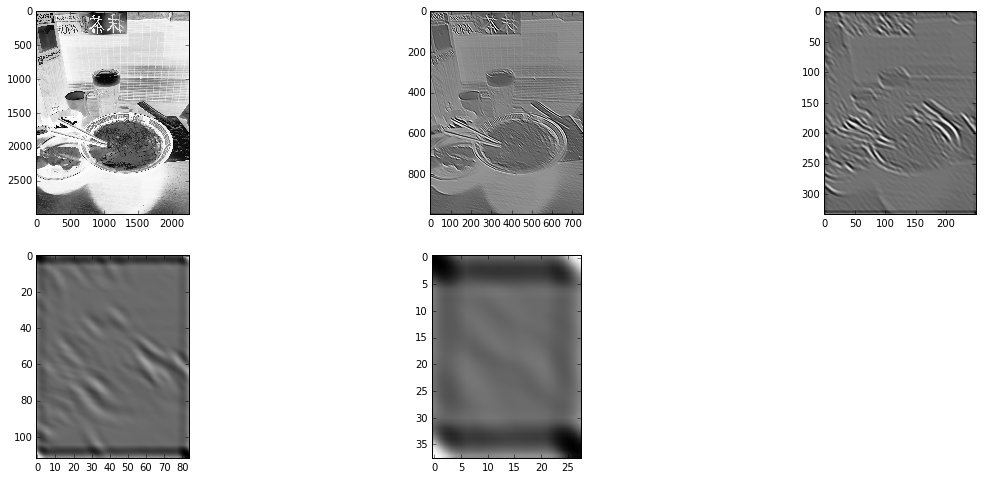

In [15]:
res.shape

plt.figure(figsize = (20,8))
plt.subplot(2,3,1)
plt.imshow(img[:,:],cmap=plt.get_cmap('Greys'),)
plt.subplot(2,3,2)
plt.imshow(res[0,:,:,0],cmap=plt.get_cmap('Greys'))
plt.subplot(2,3,3)
plt.imshow(res1[0,:,:,0],cmap=plt.get_cmap('Greys'))
plt.subplot(2,3,4)
plt.imshow(res2[0,:,:,0],cmap=plt.get_cmap('Greys'))
plt.subplot(2,3,5)
plt.imshow(res3[0,:,:,0],cmap=plt.get_cmap('Greys'))




In [160]:
# ?np.meshgrid
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

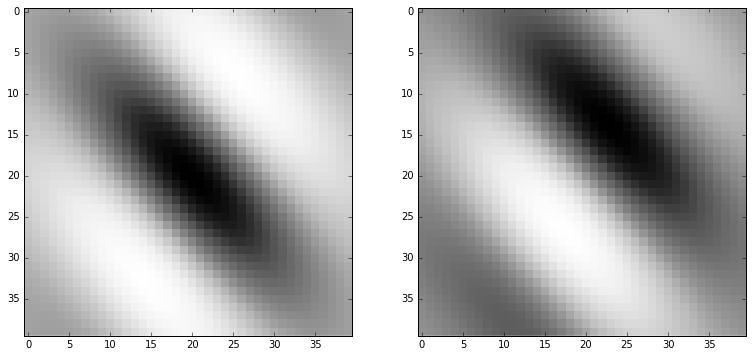

In [10]:
#create 

def period_kernel(u,v,resolution = 10):
    '''Create discrete periodic 2d kernal of the form A*exp(2*pi*i*(u*x + y*v)) and return sin and cos filters
    
        Input - u - wave numbers x comp K = (u,v)
                v - wave numbers y comp K = (u,v)
                resolution = size of kernel (resoltion,resolution) 
    
    '''
    xx,yy = np.meshgrid(np.arange(-resolution,resolution),np.arange(-resolution,resolution))


    def des_sin(x,y,u,v):
        N = len(x)
        sol = np.sin(2*np.pi*(u*x + v*y)/N)
        A = 1/np.sum(sol)
        return A*sol

    def des_cos(x,y,u,v):
        N = len(x)
        sol = np.cos(2*np.pi*(u*x + v*y)/N)
        A = 1/np.sum(sol)
        return A*sol

    def des_sin_cos(x,y,u,v):
        N = len(x)
        return 1*np.sin(2*np.pi*(u*x + v*y)/N) + 1*np.cos(2*np.pi*(u*x + v*y)/N)

    
    return (des_sin(xx,yy,u,v),des_cos(xx,yy,u,v))
    
    
def garbor_kernel((u,v),sig1,sig2,resolution = 10):
    '''Create discrete periodic 2d kernal of the form A*cos(2*pi*(u*x + y*v))*Gaussian and return sin and cos filters
    
        Input - (u,v) - tuple - wave numbers x comp K = (u,v)
                sig1 = standard_dev of gaussian x
                sig2 = standard_dev of gaussian y
                resolution = size of kernel (resoltion,resolution) 
    
    '''
    xx,yy = np.meshgrid(np.arange(-resolution,resolution),np.arange(-resolution,resolution))

    def des_cos_gar(x,y,u,v):
        N = len(x)
        sol = np.cos(2*np.pi*(u*x + v*y)/N)*np.exp(-(x**2)/(N*2*np.pi*sig1**2) - y**2/(N*2*np.pi*sig2**2))
        A = 1/np.sum(np.sum(sol))
        return A*sol
    
    def des_sin_gar(x,y,u,v):
        N = len(x)
        sol = np.sin(2*np.pi*(u*x + v*y)/N)*np.exp(-(x**2)/(N*2*np.pi*sig1**2) - y**2/(N*2*np.pi*sig2**2))
        A = 1/np.sum(sol)
        return A*sol

    return (des_cos_gar(xx,yy,u,v),des_sin_gar(xx,yy,u,v))
    
    
    
    
# per_kern_sin, per_kern_cos = period_kernel(0,4,resolution = 20)
per_kern_sin, per_kern_cos = garbor_kernel((1,-1),1,1.5,resolution = 20)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(per_kern_sin,cmap=plt.get_cmap('Greys'),interpolation='none')
plt.subplot(1,3,2)
plt.imshow(per_kern_cos,cmap=plt.get_cmap('Greys'),interpolation='none')
# plt.subplot(1,3,3)
# plt.imshow(des_sin_cos(xx,yy,2,2),cmap=plt.get_cmap('Greys'),interpolation='none')



In [257]:
resolut = 10
xx,yy = np.meshgrid(np.arange(-resolut,resolut),np.arange(resolut,resolut))




N = len(xx)

# np.cos(2*np.pi*(2*xx + 2*yy)/N)*np.exp((xx^2)/(2*np.pi*1^2) + yy^2/(2*np.pi*1^2))


6.283185307179586